<b>ФИО:</b> <i>Cенчило П. В.</i>;
<br><b>ПА №:</b> `3` = <b>Блок</b> № `3`;
<br><b>Дата:</b> `2023-09-22`.

**Тема:**
"Модуль 3. Нейронные сети — Промежуточная аттестация"

# Промежуточная аттестация по сетям искусcтвенных нейронов.

## Задание.

Ваша **задача** - создать классификатор изображений с помощью `Keras` и свёрточных нейронных сетей для набора данных `Fashion MNIST`.
<br>Этот набор данных включает `10` меток с разными типами одежды, с изображениями `28 на 28` (пикселей) в оттенках серого.
<br>Имеется обучающий набор из `60 000` изображений и `10 000` тестовых изображений.

**Описание классов:**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot


In [1]:
Labels_L = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("Class Names:\n", Labels_L)

Labels_n = len(Labels_L)
print("=> Number of Labels =", Labels_n)

Classes_L = [0] * Labels_n
for i in range(Labels_n):
    Classes_L[i] = i
print("Class Numbers:\n", Classes_L)

Class Names:
 ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
=> Number of Labels = 10
Class Numbers:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Данные.

**Загружаем данные:**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("Versions of:")
print("- TensorFlow:\t", tf.__version__)
print("- Keras:\t", keras.__version__)

Versions of:
- TensorFlow:	 2.9.1
- Keras:	 2.9.0


In [3]:
# Fashion MNIST

from tensorflow.keras.datasets import fashion_mnist

# X = images, Y = labels
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

## Визуализация дата-сета.

**Используйте `MatPlotLib`, чтобы показать пример картинки.**

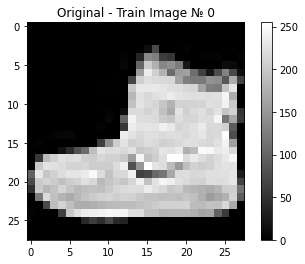

In [4]:
plt.figure()
plt.title("Original - Train Image № 0")
plt.imshow(X_train[0], cmap = 'gray') # <matplotlib.image.AxesImage at 0x1e912d90>
plt.colorbar() # extend = "both"
plt.grid(False)
plt.show()

In [5]:
print("Original - Train Image № 0:")
print("- Label:", Y_train[0], "=", Labels_L[Y_train[0]])
print("- Image:")
X_train[0]

Original - Train Image № 0:
- Label: 9 = Ankle boot
- Image:


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## Предобработка.

**Нормализуйте данные `X_train` и `X_test`.**

In [6]:
max_px = 255.0
print("max_px =", int(max_px))

X_train = X_train / max_px
X_test  = X_test  / max_px

max_px = 255


In [7]:
print("Normalized - Train Image № 0:")
print("- Image:")
X_train[0]

Normalized - Train Image № 0:
- Image:


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

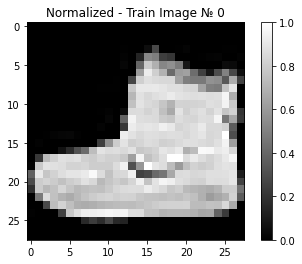

In [8]:
plt.figure()
plt.title("Normalized - Train Image № 0")
plt.imshow(X_train[0], cmap = 'gray') # <matplotlib.image.AxesImage at 0x1e912d90>
plt.colorbar() # extend = "both"
plt.grid(False)
plt.show()

**Измените форму массивов `X_train` и `X_test` так, чтобы они стали `4`-хмерными (`batch_size x channels x Height x Width`).**

In [9]:
#

In [10]:
print("0) Old:")
print("Shapes of:")
print("- Images:")
print("-- Train:", X_train.shape)
print("-- Test :", X_test.shape)
print("- Labels:")
print("-- Train:", Y_train.shape)
print("-- Test :", Y_test.shape)

print()
len_X_train = len(X_train)
len_X_test = len(X_test)
print("Length of [X_train] =", len_X_train)
print("Length of [X_test ] =", len_X_test)

0) Old:
Shapes of:
- Images:
-- Train: (60000, 28, 28)
-- Test : (10000, 28, 28)
- Labels:
-- Train: (60000,)
-- Test : (10000,)

Length of [X_train] = 60000
Length of [X_test ] = 10000


In [11]:
H = 28
W = H
print("Height =", H, "(px)")
print("Width  =", W, "(px)")

Height = 28 (px)
Width  = 28 (px)


In [12]:
# Reshape from 3-D to a 4-D Array of Images: (batch_size, channels, height, width) # NCHW
# New Shape: (batch, 1, 28, 28)
new_X_train = tf.reshape(X_train, shape = [-1, 1, H, W])
new_X_test  = tf.reshape(X_test,  shape = [-1, 1, H, W])

In [13]:
new_X_train_N = len(new_X_train)
new_X_train_C = len(new_X_train[0])

print("new_X_train = ...")
#print(new_X_train)

print("=> Shape = (" + str(new_X_train_N) + " * " + str(new_X_train_C) + " * " + str(H) + " * " + str(W) + ")")
print(new_X_train_N, "*", new_X_train_C, "=", new_X_train_N * new_X_train_C, "==", len_X_train)

#new_X_train[100] # shape = (1, 28, 28)

new_X_train = ...
=> Shape = (60000 * 1 * 28 * 28)
60000 * 1 = 60000 == 60000


In [14]:
new_X_test_N = len(new_X_test)
new_X_test_C = len(new_X_test[0])

print("new_X_test = ...")
#print(new_X_test)

print("=> Shape = (" + str(new_X_test_N) + " * " + str(new_X_train_C) + " * " + str(H) + " * " + str(W) + ")")
print(new_X_test_N, "*", new_X_test_C, "=", new_X_test_N * new_X_test_C, "==", len_X_test)

new_X_test = ...
=> Shape = (10000 * 1 * 28 * 28)
10000 * 1 = 10000 == 10000


In [15]:
print("1) New:")
print("Shapes of:")
print("- Images:")
print("-- Train:",  new_X_train.shape)
print("-- Test :", new_X_test.shape)

1) New:
Shapes of:
- Images:
-- Train: (60000, 1, 28, 28)
-- Test : (10000, 1, 28, 28)


**Преобразуйте  `y_train` и `y_test` в `one_hot`-представления.**

In [16]:
print("\na) TensorFlow (TF):\n")

depth = Labels_n 
print("depth =", depth)

print()
print(Classes_L)

print("\nOne Hot Encoded Y_ Labels of X_ Objects:")
print("- Train:")
new_a_Y_train = tf.one_hot(Y_train, depth)
print("new_a_Y_train =")
print(new_a_Y_train)
print("- Test :")
new_a_Y_test  = tf.one_hot(Y_test,  depth)
print("new_a_Y_test  =")
print(new_a_Y_test)


a) TensorFlow (TF):

depth = 10

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

One Hot Encoded Y_ Labels of X_ Objects:
- Train:
new_a_Y_train =
tf.Tensor(
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60000, 10), dtype=float32)
- Test :
new_a_Y_test  =
tf.Tensor(
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 10), dtype=float32)


In [17]:
print("\nb) Keras:")

# num_classes = Total number of classes. If None, this would be inferred as max(y) + 1.

print()
print(Classes_L)

print("\nOne Hot Encoded Y_ Labels of X_ Objects:")
print("- Train:")
new_b_Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = Labels_n)
print("new_b_Y_train =")
print(new_b_Y_train)
print("- Test :")
new_b_Y_test  = tf.keras.utils.to_categorical(Y_test, num_classes = Labels_n)
print("new_b_Y_test  =")
print(new_b_Y_test)


b) Keras:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

One Hot Encoded Y_ Labels of X_ Objects:
- Train:
new_b_Y_train =
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
- Test :
new_b_Y_test  =
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Создайте модель.

**(При выполнении задания вы можете поэкспериментировать со слоями.)
<br> Примерная структура модели:**

1. Свёрточный слой, `32` фильтра, размер ядра `= (4, 4)`;
2. Пулинг с `pool_size = (2, 2)`;
3. Выпрямляющий слой (`Flatten`);
4. Полносвязный слой (например, `128` нейронов), `RELU`;
5. Выходной полносвязный слой с `10` нейронами с `SoftMax`.

**При компиляции укажите `loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']`.**

In [18]:
def Filters(Layer):
    #
    filters_L, bias_L = Layer.get_weights() # model.layers[0]
    print("\n2D Convolutional Layer Name:", Layer.name)
    print("Filter Shape:", filters_L.shape)
    
    print("\nfilters_L:")
    print(filters_L)
    
    print("\nbias_L:")
    print(bias_L)
    
    f_min, f_max = filters_L.min(), filters_L.max()
    filters_L = (filters_L - f_min) / (f_max - f_min)
    print("\nNormalized filters_L:")
    print(filters_L)
    
    n_filters = 32 #
    print("\nNumber of Filters =", n_filters)

    n_cols = 1
    n_rows = int(n_filters / n_cols)
    ix = 1 #
    print("\nAll the Filters:")
    fig, axes = plt.subplots(nrows = n_rows, ncols = n_cols, dpi = 100, figsize = (50, 50))
    for i in range(n_filters):
        f = filters_L[:,:,:,i]
        for j in range(1): 
            # SubPlot for 32 Filters and 1 Channel
            plt.subplot(n_filters, 1, ix) #
            plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 1.5, wspace = 0.4, hspace = 0.4)
            plt.title("Filter № " + str(i))
            plt.imshow(f[:,:,j], cmap = 'gray')
            ix += 1 #
    plt.show()    
    
    return()

In [19]:
def Build_Model():

    # 2D = (N, (H, W), C)
    Layer_1_Conv2D = tf.keras.layers.Conv2D(filters = 32, kernel_size = (4, 4), padding = 'same', data_format = 'channels_last', activation = None)
    #Layer_1_Conv2D = tf.keras.layers.Conv2D(filters = 32, kernel_size = (4, 4), padding = 'same', data_format = 'channels_first', activation = 'relu', input_shape = (28, 28, 10))
    
    Layer_2_Pool = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), padding='same', data_format = 'channels_last') #
    
    Layer_3_Flat = tf.keras.layers.Flatten(data_format = 'channels_last') #input_shape = (28, 28, 1)) #
    
    # tf.keras.layers.Dense(activation='relu') = tf.keras.layers.ReLu()
    #Layer_4_ReLU = tf.keras.layers.ReLU()
    Layer_4_ReLU = tf.keras.layers.Dense(units = 128, activation = 'relu')
    
    # tf.keras.layers.Dense(activation='softmax') = tf.keras.layers.Softmax()
    #Layer_5_SoftMax = tf.keras.layers.Softmax()    
    Layer_5_SoftMax = tf.keras.layers.Dense(units = 10, activation = 'softmax')
    
    #model.add(layers.Dense(128))
    #model.add(layers.Activation(activations.relu))    
    
    model = tf.keras.Sequential([
        Layer_1_Conv2D,
        Layer_2_Pool,
        Layer_3_Flat,
        Layer_4_ReLU,
        Layer_5_SoftMax
    ])

    ML = model.layers
    print("Model Layers:", len(ML))
    print(":", ML)   

    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return(model)

In [20]:
#model = tf.keras.Sequential()
#model.add(Layer_1_Conv2D)
#model.add(Layer_2_Pool)
#model.add(Layer_3_Flat)
#model.add(Layer_4_ReLU)
#model.add(Layer_5_SoftMax)

#ML = model.layers
#print("Model Layers:", len(ML))
#print(":", ML)

In [23]:
model_0 = Build_Model()

Model Layers: 5
: [<keras.layers.convolutional.conv2d.Conv2D object at 0x000000001C4B7340>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000000001C4B7310>, <keras.layers.reshaping.flatten.Flatten object at 0x000000001C4B73D0>, <keras.layers.core.dense.Dense object at 0x000000001C4B7BB0>, <keras.layers.core.dense.Dense object at 0x000000001C4B7C40>]


In [25]:
model_1 = Build_Model()

Model Layers: 5
: [<keras.layers.convolutional.conv2d.Conv2D object at 0x000000001C170190>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000000001C4B7040>, <keras.layers.reshaping.flatten.Flatten object at 0x000000001C170340>, <keras.layers.core.dense.Dense object at 0x000000001C4B38B0>, <keras.layers.core.dense.Dense object at 0x000000001C4B3790>]


### Тренировка модели.
**Тренируем модель на `X_train`. 
<br> Число эпох выберите самостоятельно.**

In [26]:
#

In [27]:
epochs_n = 10
print("Number of Epochs =", epochs_n)
print()
model_1.fit(x = new_X_train, y = new_a_Y_train, epochs = epochs_n) # batch_size = 32

Number of Epochs = 10

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.4731 - accuracy: 0.8307
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3452 - accuracy: 0.8762
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3127 - accuracy: 0.8882
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2924 - accuracy: 0.8947
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2779 - accuracy: 0.9004
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2660 - accuracy: 0.9037
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2582 - accuracy: 0.9068
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2487 - accuracy: 0.9108
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2413 - accuracy: 0.9136
Epoch 10/10
1875/1875 [==================

In [28]:
# <keras.callbacks.History at 0x1c752be0>

In [29]:
print("Model_1 Summary:\n")
model_1.summary()

Model_1 Summary:

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (32, 1, 28, 32)           14368     
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 1, 14, 32)          0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (32, 448)                 0         
                                                                 
 dense_8 (Dense)             (32, 128)                 57472     
                                                                 
 dense_9 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 73,130
Trainable params: 73,130
Non-trainable params: 0
________________________________

In [30]:
BS = 32 # batch_size
img_n = 1875
print(BS, "*", img_n, "=", BS * img_n, "==", len_X_train)

32 * 1875 = 60000 == 60000


### Оценка модели.

**Оцените модель по метрикам `accuracy`, `precision`, `recall`, `f1-score` на тестовой выборке `X_test`.**

In [31]:
a_Metrics = model_1.evaluate(x = new_X_test, y = new_a_Y_test, return_dict = True)
# 313/313 [==============================] - 2s 6ms/step - loss: 0.3674 - accuracy: 0.8862
# 313/313 [==============================] - 2s 7ms/step - loss: 0.3634 - accuracy: 0.8867
print("Metrics:", a_Metrics)

a_Acc = a_Metrics['accuracy']
print(": a) Accuracy =", a_Acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.3779 - accuracy: 0.8856
Metrics: {'loss': 0.37790119647979736, 'accuracy': 0.8855999708175659}
: a) Accuracy = 0.8855999708175659


In [34]:
b_Metrics = model_1.evaluate(x = new_X_test, y = new_b_Y_test, return_dict = False)
# 313/313 [==============================] - 2s 7ms/step - loss: 0.3674 - accuracy: 0.8862
# 313/313 [==============================] - 2s 7ms/step - loss: 0.3634 - accuracy: 0.8867
print("Metrics:", b_Metrics)

b_Acc = b_Metrics[1]
print(": b) Accuracy =", b_Acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.3779 - accuracy: 0.8856
Metrics: [0.37790119647979736, 0.8855999708175659]
: b) Accuracy = 0.8855999708175659


In [33]:
print("Model_1 Metrics Names:")
print(model_1.metrics_names) # ['loss', 'acc']

Model Metrics Names:
['loss', 'accuracy']


In [35]:
from sklearn.metrics import classification_report, accuracy_score

In [36]:
Y_predictions = model_1.predict(new_X_test)
# 313/313 [==============================] - 2s 6ms/step

313/313 [==============================] - 2s 6ms/step


In [37]:
print("[Y_predictions] =")
print(Y_predictions)

[Y_predictions] =
[[9.5799117e-13 4.0743795e-13 4.5897511e-11 ... 9.7030919e-04
  8.8029140e-10 9.9747497e-01]
 [2.2296948e-07 5.9875886e-17 9.9905998e-01 ... 6.7908799e-19
  4.7597668e-13 2.6959868e-18]
 [6.1015793e-12 1.0000000e+00 2.5874877e-15 ... 0.0000000e+00
  3.8004468e-20 1.9930233e-35]
 ...
 [3.5610344e-07 1.2150718e-24 1.3817521e-10 ... 2.1454325e-14
  9.9999881e-01 7.2018787e-21]
 [2.1875394e-12 1.0000000e+00 2.5094154e-11 ... 7.4830841e-24
  4.2253111e-16 3.6157559e-23]
 [1.7229135e-05 8.0870623e-06 6.1062345e-04 ... 3.5717630e-01
  3.0693524e-03 4.8097968e-03]]


In [38]:
Y_predictions = Y_predictions.round()
print("[Y_predictions] =")
print(Y_predictions)

[Y_predictions] =
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
print("[new_a_Y_test] =")
print(new_a_Y_test)

[new_a_Y_test] =
tf.Tensor(
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 10), dtype=float32)


In [40]:
print("[new_b_Y_test] =")
print(new_b_Y_test)

[new_b_Y_test] =
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
a_AS = accuracy_score(y_true = new_a_Y_test, y_pred = Y_predictions)
print("a) Accuracy:", a_AS)

print("\nClassification Report:\n")
print(classification_report(y_true = new_a_Y_test, y_pred = Y_predictions, labels = Classes_L, target_names = Labels_L, zero_division = 'warn'))

a) Accuracy: 0.8782

Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.81      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.84      0.80      1000
       Dress       0.90      0.89      0.89      1000
        Coat       0.84      0.77      0.80      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.72      0.67      0.69      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

   micro avg       0.89      0.88      0.89     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.88      0.89     10000
 samples avg       0.88      0.88      0.88     10000



d:\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# avg / total       0.91      0.91      0.91     10000

In [43]:
b_AS = accuracy_score(y_true = new_b_Y_test, y_pred = Y_predictions)
print("b) Accuracy:", b_AS)

print("\nClassification Report:\n")
CR_D = classification_report(y_true = new_b_Y_test, y_pred = Y_predictions, output_dict = True)
CR_D

b) Accuracy: 0.8782

Classification Report:



d:\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 0.8477580813347236,
  'recall': 0.813,
  'f1-score': 0.8300153139356814,
  'support': 1000},
 '1': {'precision': 0.9907881269191402,
  'recall': 0.968,
  'f1-score': 0.9792615073343449,
  'support': 1000},
 '2': {'precision': 0.775,
  'recall': 0.837,
  'f1-score': 0.8048076923076922,
  'support': 1000},
 '3': {'precision': 0.9030612244897959,
  'recall': 0.885,
  'f1-score': 0.8939393939393939,
  'support': 1000},
 '4': {'precision': 0.8430296377607025,
  'recall': 0.768,
  'f1-score': 0.8037676609105181,
  'support': 1000},
 '5': {'precision': 0.9835051546391752,
  'recall': 0.954,
  'f1-score': 0.9685279187817258,
  'support': 1000},
 '6': {'precision': 0.7170212765957447,
  'recall': 0.674,
  'f1-score': 0.6948453608247422,
  'support': 1000},
 '7': {'precision': 0.933589990375361,
  'recall': 0.97,
  'f1-score': 0.9514467876410004,
  'support': 1000},
 '8': {'precision': 0.9785276073619632,
  'recall': 0.957,
  'f1-score': 0.9676440849342771,
  'support': 1000}

In [44]:
Support_sum = 0
Support_L   = [0] * Labels_n
Precision_L = [0] * Labels_n
Recall_L    = [0] * Labels_n
F1Score_L   = [0] * Labels_n 

print("[Classes_L] =", str(Classes_L))
for i in range(Labels_n):
    n = str(i)

    Support_L[i] = CR_D[n]['support']
    Support_sum += Support_L[i]
    
    Precision_L[i] = CR_D[n]['precision']
    Recall_L[i] = CR_D[n]['recall']
    F1Score_L[i] = CR_D[n]['f1-score']
    
print("\n[Support_L] =", Support_L)
Support_n = CR_D['samples avg']['support'] #
print("=> sum([Support_L]) =", Support_n)
print(" Support_n =", Support_n, "==", Support_n)

print("\n[Precision_L] =", Precision_L)
print("\n[Recall_L]    =", Recall_L)
print("\n[F1Score_L]   =", F1Score_L)

[Classes_L] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[Support_L] = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
=> sum([Support_L]) = 10000
 Support_n = 10000 == 10000

[Precision_L] = [0.8477580813347236, 0.9907881269191402, 0.775, 0.9030612244897959, 0.8430296377607025, 0.9835051546391752, 0.7170212765957447, 0.933589990375361, 0.9785276073619632, 0.9646821392532795]

[Recall_L]    = [0.813, 0.968, 0.837, 0.885, 0.768, 0.954, 0.674, 0.97, 0.957, 0.956]

[F1Score_L]   = [0.8300153139356814, 0.9792615073343449, 0.8048076923076922, 0.8939393939393939, 0.8037676609105181, 0.9685279187817258, 0.6948453608247422, 0.9514467876410004, 0.9676440849342771, 0.9603214465092919]


In [45]:
avg_total_Precision = 0
avg_total_Recall    = 0
avg_total_F1Score   = 0

for i in range(Labels_n):
    avg_total_Precision += Precision_L[i] * (Support_L[i] / Support_n)
    avg_total_Recall    += Recall_L[i]    * (Support_L[i] / Support_n)
    avg_total_F1Score   += F1Score_L[i]   * (Support_L[i] / Support_n)
    
print("[avg_total_Precision] =\t", avg_total_Precision)
print("[avg_total_Recall]    =\t", avg_total_Recall)
print("[avg_total_F1Score]   =\t", avg_total_F1Score)

[avg_total_Precision] =	 0.8936963238729887
[avg_total_Recall]    =	 0.8782000000000001
[avg_total_F1Score]   =	 0.8854577167118669


In [46]:
def round_2(numb):
    numb = round(numb, 2)
    return numb

avg_total_Precision = round_2(avg_total_Precision)
avg_total_Recall    = round_2(avg_total_Recall)
avg_total_F1Score   = round_2(avg_total_F1Score)

print("[Classes_L] =\n", Classes_L)
print("[Labels_L]  =\n", Labels_L)

b_A = round_2(b_Acc)
print("\nAccuracy:", b_A) # a_AS

print("\nClassification Report:\n")
print(classification_report(y_true = new_b_Y_test, y_pred = Y_predictions, output_dict = False))

print('{:>12} {:>10} {:>9} {:>9.2f} {:>9}'.format("accuracy", '', '', a_AS, Support_n))
#
print()
print('{:>12} {:>10.2f} {:>9} {:>9.2f} {:>9}'.format("avg / total", avg_total_Precision, avg_total_Recall, avg_total_F1Score, Support_n))
#
# avg / total       0.91      0.91      0.91     10000

[Classes_L] =
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[Labels_L]  =
 ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Accuracy: 0.89

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.84      0.80      1000
           3       0.90      0.89      0.89      1000
           4       0.84      0.77      0.80      1000
           5       0.98      0.95      0.97      1000
           6       0.72      0.67      0.69      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

   micro avg       0.89      0.88      0.89     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.88      0.89     10000
 samples avg       0.88      0.88

d:\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Accuracy (Test):
# - a_AS  = based on new_a_Y_test (SKL.accuracy_score())
# - b_AS  = based on new_b_Y_test (SKL.accuracy_score())
# - a_Acc = based on new_a_Y_test (model.evaluate())  from Dictionary
# - b_Acc = based on new_b_Y_test (model.evaluate())  from List
# - b_A = rounded b_A
print(a_AS, '\t\t\t=', b_AS)
print("? ~")
print(a_Acc, '\t=', b_Acc, '~', b_A)

0.8782 			= 0.8782
? ~
0.8855999708175659 	= 0.8855999708175659 ~ 0.89


## Дополнительно:
 
* Отрисуйте фильтры на слое `Conv2D`, сравните до и после обучения модели.

In [48]:
#

Фильтры _ обучения ИНС:

1) после:


2D Convolutional Layer Name: conv2d_4
Filter Shape: (4, 4, 28, 32)

filters_L:
[[[[-0.02278701  0.03301477 -0.05003152 ...  0.06560069 -0.02148585
     0.02234253]
   [ 0.05170422 -0.06889647 -0.07714505 ...  0.03325406 -0.05746736
     0.01752259]
   [-0.03716104 -0.06831706  0.04785841 ...  0.00173015 -0.07415614
     0.06976876]
   ...
   [-0.04139077  0.06830577 -0.00724167 ... -0.0254798   0.03427916
     0.02889916]
   [ 0.03743655  0.03687786 -0.04362151 ...  0.07545414  0.06666053
    -0.07590456]
   [ 0.0730386  -0.07857735 -0.07115386 ... -0.04506317  0.07670354
     0.03147148]]

  [[-0.05749973 -0.06361052  0.0208868  ...  0.06114749  0.00325022
    -0.03387073]
   [ 0.00539359  0.06131079  0.04507305 ... -0.07302226  0.06882233
    -0.03455258]
   [ 0.05106772  0.06946368 -0.00996438 ... -0.04015421  0.07309396
     0.04838789]
   ...
   [-0.05735107 -0.02776888 -0.04731369 ... -0.0735544  -0.02337151
    -0.04764389]
   [-0.064999   -0

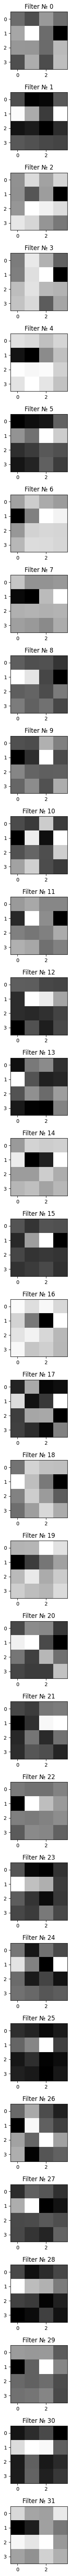

()

In [49]:
print("Фильтры _ обучения ИНС:\n")
print("1) после:\n")
Filters(model_1.layers[0])

In [64]:
#

In [50]:
#model1 = tf.keras.Sequential()
#model1.add(Layer_1_Conv2D)
#model1.add(Layer_2_Pool)
#model1.add(Layer_3_Flat)
#model1.add(Layer_4_ReLU)
#model1.add(Layer_5_SoftMax)

#ML1 = model1.layers
#print("Model1 Layers:", len(ML1))
#print(":", ML1)

In [53]:
model_0.build(input_shape = (0, 28, 28, 1)) #

In [54]:
model_0.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [56]:
epochs_n = 0
print("Number of Epochs =", epochs_n)
print()
model_0.fit(x = new_X_train, y = new_a_Y_train, epochs = epochs_n,  batch_size = 0)

Number of Epochs = 0



In [57]:
# <keras.callbacks.History at 0x1e9958e0>

In [59]:
print("Model_0 Summary:\n")
model_0.summary()

Model_0 Summary:

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (0, 28, 28, 32)           544       
                                                                 
 max_pooling2d_2 (MaxPooling  (0, 14, 14, 32)          0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (0, 6272)                 0         
                                                                 
 dense_4 (Dense)             (0, 128)                  802944    
                                                                 
 dense_5 (Dense)             (0, 10)                   1290      
                                                                 
Total params: 804,778
Trainable params: 804,778
Non-trainable params: 0
______________________________

Фильтры _ обучения ИНС:

0) до:


2D Convolutional Layer Name: conv2d_2
Filter Shape: (4, 4, 1, 32)

filters_L:
[[[[-0.09814546  0.01568388 -0.10279022  0.01488703  0.00105276
    -0.06631043  0.04027154 -0.09516607  0.10579129  0.06631005
    -0.03724965 -0.10249743  0.09188528 -0.00169381  0.08251691
    -0.06088503 -0.04077052 -0.06113103 -0.06407869  0.08750015
     0.06847773 -0.08418749  0.09201956 -0.05716575 -0.02971157
    -0.05212459  0.00158491 -0.01300763  0.05967142  0.10004789
    -0.07483619 -0.0538277 ]]

  [[-0.0140885   0.0398062  -0.0557436  -0.04100911 -0.05177019
    -0.02916798  0.08445212  0.02158082 -0.02650753  0.00612348
     0.09363773 -0.05802935  0.10090429 -0.01039913 -0.08436863
     0.09781685 -0.03838768 -0.06508899 -0.08882973  0.03034441
    -0.09742582  0.05924575  0.02257611 -0.10163739  0.03195034
    -0.0476755  -0.00655507  0.00753676 -0.06295279  0.00066888
     0.05393219  0.05324441]]

  [[ 0.03902312 -0.05849724  0.09911801  0.02698985 -0.081

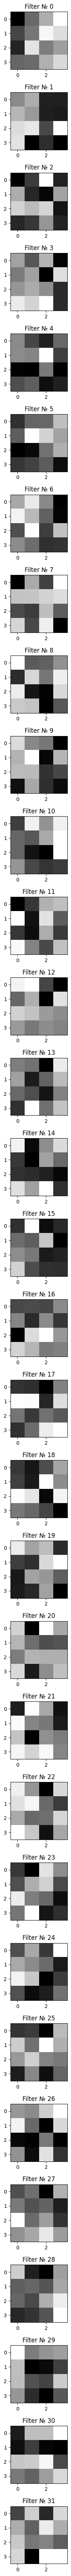

()

In [61]:
print("Фильтры _ обучения ИНС:\n")
print("0) до:\n")
Filters(model_0.layers[0])

**Вывод:**
<br>
Судя по отрисованным фильтрам на `1`-м свёрточном слое `Conv2D` до и после обучения модели, они отличаются друг от друга.
<br>
`model_0` - необученная модель (`(epochs = 0) & (batch_size = 0)`), а `model_1` - такая же по архитектуре, но уже обученная.
<br>
У них разное число параметров.
<br>
Точность необученной модели не может быть достаточной для совершения предсказаний.